In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [2]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [3]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')

In [4]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [5]:
# # Ausreißer manuell auf np.nan setzen
# WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

# WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
# WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

# L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
# L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [6]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [7]:
# nan Auswertung

In [8]:
print('WS100')
fct.nan_nonan_ratio(WS100_rtu, 'precipitation.1')
fct.nan_nonan_ratio(WS100_rtu, 'precipitation.2')
print('\n')
print('WS300')
fct.nan_nonan_ratio(WS300_rtu, 'precipitation.1')
print('\n')
print('Raine')
fct.nan_nonan_ratio(Raine_rtu, 'Niederschlagsmenge')
print('\n')
print('L_pcp')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_07')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_09')
fct.nan_nonan_ratio(L_pcp_rtu, 'rr_10')

WS100
count of nans: 8 
length of data: 1051019 
Ratio of nan/nonan: 0.0 %
count of nans: 8 
length of data: 1051019 
Ratio of nan/nonan: 0.0 %


WS300
count of nans: 493811 
length of data: 1575142 
Ratio of nan/nonan: 31.35 %


Raine
count of nans: 193 
length of data: 772077 
Ratio of nan/nonan: 0.02 %


L_pcp
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %
count of nans: 2660 
length of data: 2266560 
Ratio of nan/nonan: 0.12 %


In [9]:
x = fct.longest_nan_sequence(WS100_rtu, 'precipitation.1')
print(x)
x = fct.longest_nan_sequence(WS100_rtu, 'precipitation.2')
print(x)
print('\n')
x = fct.longest_nan_sequence(WS300_rtu, 'precipitation.1')
print(x)
print('\n')
x = fct.longest_nan_sequence(Raine_rtu, 'Niederschlagsmenge')
print(x)
print('\n')
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_07')
print(x)
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_09')
print(x)
x = fct.longest_nan_sequence(L_pcp_rtu, 'rr_10')
print(x)


{'precipitation.1': 3}
{'precipitation.2': 3}


{'precipitation.1': 493798}


{'Niederschlagsmenge': 159}


{'rr_07': 1390}
{'rr_09': 1390}
{'rr_10': 1390}


In [10]:
def list_nan_sequences(dataframe, column, min_len):

    dataframe = dataframe
    dataframe_mask = dataframe.isna()
    column = column

    list = []

    count = 0
    index_count = 0

    for value in dataframe_mask[column]:
        if value == True:
            if count == 0:    
                index_start = dataframe[column].index[index_count]
                count += 1
            else:
                count += 1
                if dataframe[column].index[index_count] == dataframe[column].index[-1]:
                    index_end = dataframe[column].index[index_count]
                    if count < min_len:
                        pass
                    else:
                        list.append([count, index_start, index_end])

        else:
            if count == 0:
                pass
            else:
                index_end = dataframe[column].index[index_count - 1]
                if count < min_len:
                    pass
                else:
                    list.append([count, index_start, index_end])
                count = 0
        index_count += 1

    print('Count of nan sequences with min len ' + str(min_len) + ':', len(list))

    return list

In [12]:
print(list_nan_sequences(WS100_rtu, 'precipitation.1', 0))
print(list_nan_sequences(WS300_rtu, 'precipitation.1', 0))
print(list_nan_sequences(Raine_rtu, 'Niederschlagsmenge', 0))
print(list_nan_sequences(L_pcp_rtu, 'rr_07', 5))
print(list_nan_sequences(L_pcp_rtu, 'rr_09', 5))
print(list_nan_sequences(L_pcp_rtu, 'rr_10', 5))

Count of nan sequences with min len 0: 4
[[2, Timestamp('2021-11-05 08:31:00'), Timestamp('2021-11-05 08:32:00')], [1, Timestamp('2021-11-05 08:43:00'), Timestamp('2021-11-05 08:43:00')], [3, Timestamp('2022-11-03 11:10:00'), Timestamp('2022-11-03 11:12:00')], [2, Timestamp('2022-11-21 16:21:00'), Timestamp('2022-11-21 16:22:00')]]
Count of nan sequences with min len 0: 8
[[3, Timestamp('2021-02-24 08:00:00'), Timestamp('2021-02-24 08:06:00')], [2, Timestamp('2021-04-29 11:30:00'), Timestamp('2021-04-29 12:00:00')], [1, Timestamp('2021-09-16 14:59:00'), Timestamp('2021-09-16 14:59:00')], [1, Timestamp('2021-09-27 09:42:00'), Timestamp('2021-09-27 09:42:00')], [2, Timestamp('2021-11-05 08:31:00'), Timestamp('2021-11-05 08:32:00')], [1, Timestamp('2021-11-05 08:43:00'), Timestamp('2021-11-05 08:43:00')], [3, Timestamp('2022-11-03 11:10:00'), Timestamp('2022-11-03 11:12:00')], [493798, Timestamp('2022-11-14 10:49:00'), Timestamp('2023-10-23 08:46:00')]]
Count of nan sequences with min len

In [13]:
def i_nans_before_peak(data, station, quantile):

    # if y == 'pr':
    #     timegap = datetime.timedelta(hours=1)
    # elif y == 'sc':
    #     timegap = datetime.timedelta(minutes=5)

    timegap = datetime.timedelta(minutes=1)

    dataframe = data[station]

    peaks = dataframe[dataframe > dataframe.quantile(quantile)]
    
    for index_peak in peaks.index:
        count = 0
        for i in reversed(dataframe.loc[: index_peak - timegap].isna()):
            if i == True:
                count += 1
            else:
                if count > 0:
                    print(count, 'leading nans before', index_peak)
                    break
                else:
                    # print('no leading nans before', index_peak)
                    break      
    return

In [16]:
print(i_nans_before_peak(WS100_rtu, 'precipitation.1', 0.9))

C:\Users\illic\AppData\Local\Temp\ipykernel_12660\2252812608.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in reversed(dataframe.loc[: index_peak - timegap].isna()):


None


In [17]:
print(i_nans_before_peak(WS300_rtu, 'precipitation.1', 0.9))

C:\Users\illic\AppData\Local\Temp\ipykernel_12660\2252812608.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in reversed(dataframe.loc[: index_peak - timegap].isna()):


None


In [18]:
print(i_nans_before_peak(Raine_rtu, 'Niederschlagsmenge', 0.9))

C:\Users\illic\AppData\Local\Temp\ipykernel_12660\2252812608.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in reversed(dataframe.loc[: index_peak - timegap].isna()):


159 leading nans before 2022-11-21 14:53:00
None


In [19]:
print(i_nans_before_peak(L_pcp_rtu, 'rr_07', 0.9))
print(i_nans_before_peak(L_pcp_rtu, 'rr_09', 0.9))
print(i_nans_before_peak(L_pcp_rtu, 'rr_10', 0.9))

C:\Users\illic\AppData\Local\Temp\ipykernel_12660\2252812608.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in reversed(dataframe.loc[: index_peak - timegap].isna()):


None


C:\Users\illic\AppData\Local\Temp\ipykernel_12660\2252812608.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in reversed(dataframe.loc[: index_peak - timegap].isna()):


None


C:\Users\illic\AppData\Local\Temp\ipykernel_12660\2252812608.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in reversed(dataframe.loc[: index_peak - timegap].isna()):


None


In [25]:
def list_nan_sequences(dataframe, column, min_len):

    dataframe = dataframe
    dataframe_mask = dataframe.isna()
    column = column

    list = []

    count = 0
    index_count = 0

    for value in dataframe_mask[column]:
        if value == True:
            if count == 0:    
                index_start = dataframe[column].index[index_count]
                count += 1
            else:
                count += 1
                if dataframe[column].index[index_count] == dataframe[column].index[-1]:
                    index_end = dataframe[column].index[index_count]
                    if count < min_len:
                        pass
                    else:
                        list.append(count) # , index_start, index_end])

        else:
            if count == 0:
                pass
            else:
                index_end = dataframe[column].index[index_count - 1]
                if count < min_len:
                    pass
                else:
                    list.append(count) # , index_start, index_end])
                count = 0
        index_count += 1

    print('Count of nan sequences with min len ' + str(min_len) + ':', len(list))

    return list

In [39]:
print(list_nan_sequences(WS100_rtu, 'precipitation.1', 0))
print(list_nan_sequences(WS300_rtu, 'precipitation.1', 0))
print(list_nan_sequences(Raine_rtu, 'Niederschlagsmenge', 0))
print(list_nan_sequences(L_pcp_rtu, 'rr_07', 0))
print(list_nan_sequences(L_pcp_rtu, 'rr_09', 0))
print(list_nan_sequences(L_pcp_rtu, 'rr_10', 0))

Count of nan sequences with min len 0: 4
[2, 1, 3, 2]
Count of nan sequences with min len 0: 8
[3, 2, 1, 1, 2, 1, 3, 493798]
Count of nan sequences with min len 0: 3
[32, 159, 2]
Count of nan sequences with min len 0: 32
[36, 5, 1, 5, 1, 1, 1, 2, 6, 1, 1, 3, 1, 10, 3, 3, 4, 1, 2, 5, 17, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1150, 1390]
Count of nan sequences with min len 0: 32
[36, 5, 1, 5, 1, 1, 1, 2, 6, 1, 1, 3, 1, 10, 3, 3, 4, 1, 2, 5, 17, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1150, 1390]
Count of nan sequences with min len 0: 32
[36, 5, 1, 5, 1, 1, 1, 2, 6, 1, 1, 3, 1, 10, 3, 3, 4, 1, 2, 5, 17, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1150, 1390]


In [41]:
print(list_nan_sequences(L_pcp_rtu, 'rr_10', 0))

Count of nan sequences with min len 0: 32
[36, 5, 1, 5, 1, 1, 1, 2, 6, 1, 1, 3, 1, 10, 3, 3, 4, 1, 2, 5, 17, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1150, 1390]


In [44]:
x = list_nan_sequences(L_pcp_rtu, 'rr_07', 1)

Count of nan sequences with min len 1: 32


In [45]:
len(set(x))

11

In [50]:
set(x)

{1, 2, 3, 4, 5, 6, 10, 17, 36, 1150, 1390}

In [51]:
from collections import Counter

In [52]:
counter = Counter(x)

In [56]:
counter

Counter({1: 15,
         2: 4,
         5: 3,
         3: 3,
         36: 1,
         6: 1,
         10: 1,
         4: 1,
         17: 1,
         1150: 1,
         1390: 1})

In [67]:
counter[17]

1

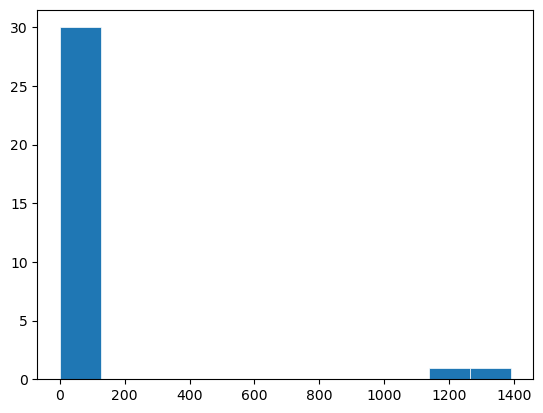

In [68]:
fig, ax = plt.subplots()

ax.hist(x, bins=len(set(x)), linewidth=0.5, edgecolor="white")

# ax.set(xlim=(0, 10), xticks=np.arange(1, 8),
#        ylim=(0, 10), yticks=np.linspace(0, 56, 9))

plt.show()